<div style="text-align: right"> Brian Wiley <br/>
EN.705.601.3VL.SP20 Applied Machine Learning </div>

## Assignment 11
### Applied Machine Learning



__1. [50 pts] In this assignment, we will use Apriori analysis to find noun phrases, or interesting patterns in a novel.
Use nltk library corpus gutenberg API and load the novel 'carroll-alice.txt' which is the Alice in Wonderland by L. Carroll. There are 1703 sentences in the novel which can be represented as 1703 transactions. Use any means to parse/extract words and save in CSV format to be read by Weka framework similar to the Apriori Analysis module.
Hint: Removing stop words and regular expressions can be useful:__

In [1]:
import nltk
import re
import numpy as np
from nltk.corpus import gutenberg, stopwords
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('punkt')

Stop_words = stopwords.words('english')
Sentences = gutenberg.sents('carroll-alice.txt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bjwil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\bjwil\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bjwil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Below I casted everything to lower case because I think it would be beneficial if we had the following two sentences to proivide rule for containing both words `white` and `rabbit`

1. White rabbit is here.
2. Where is the white rabbit?

or
1. Spades vs. diamonds
2. The spades are on the opposite side of the diamonds.

These two examples of sentences are the same in each group however because one word starts at the beginning of sentence it may not get classified as a related transaction.

In [2]:
TermsSentences = []
for terms in Sentences:
    terms = [w.lower() for w in terms if w not in Stop_words]
    terms = [w.lower() for w in terms if re.search(r'^[a-zA-Z]{2}', w) is not None]
    TermsSentences.append(terms)
    
from collections import OrderedDict
all_words = np.unique([item for sentence in TermsSentences for item in sentence])
all_words_dict = OrderedDict((word, id_) for id_, word in enumerate(all_words))

N = len(Sentences)
M = len(all_words_dict)
phrases = np.full((N,M), False, dtype=np.bool)

for i, sent in enumerate(TermsSentences):
    for term in sent:
        phrases[i, all_words_dict[term]] = True

In [3]:
## check sparse matrix
print(phrases.shape)
print(phrases[0:10, 0:36].astype(int))

(1703, 2512)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [4]:
## sanity check phrases index equal to True/1 are the same as the words in that sentence
print(np.array(np.where(phrases[8])).flatten())
check = np.array([all_words_dict[term] for term in np.unique(TermsSentences[8])])
check.sort()
print(check)
(np.where(phrases[8])==check).all()

[  13   15   35   47  255  469  637  749  758  793  829  980 1011 1040
 1100 1168 1257 1337 1391 1407 1447 1449 1486 1489 1593 1602 1684 1686
 1692 1846 1849 1851 2058 2129 2189 2211 2234 2373 2394 2461]
[  13   15   35   47  255  469  637  749  758  793  829  980 1011 1040
 1100 1168 1257 1337 1391 1407 1447 1449 1486 1489 1593 1602 1684 1686
 1692 1846 1849 1851 2058 2129 2189 2211 2234 2373 2394 2461]


True

In [5]:
import csv

Filename = 'HW_11_weka.csv'

with open(Filename, 'w') as fout:
    writer = csv.writer(fout, delimiter=',', quoting=csv.QUOTE_ALL, quotechar="'", lineterminator='\n')
    writer.writerow([k for k in all_words_dict.keys()])
    for i in range(N):
        writer.writerow(list(map(lambda x: '' if x == False else 'True',  phrases[i])))

#### Since I want to be able to learn to run batch process to weka via commandline or through Java we will writer the data out in `.arff` format for Weka command line.

In [6]:
import re

## Write in .arff format for batch running
Filename = 'HW_11_weka.arff'
datatype = '{True}'

with open(Filename, 'w') as fout:
    fout.writelines("@relation " + re.sub('\.[^.]*$', '', Filename) + '\n\n')
    fout.writelines("")
    fout.writelines([('@attribute ' + k + ' ' + datatype + '\n') for k in all_words_dict.keys()])
    fout.writelines("\n@data\n")
    writer = csv.writer(fout, delimiter=',', lineterminator='\n')
    for i in range(N):
        writer.writerow(list(map(lambda x: '?' if x == False else 'True',  phrases[i])))

After adding weka.jar to Windoww CLASSPATH and PATH variables you can run from command line.

In [7]:
# check which arguments for FPGrowth we can run with
!java weka.associations.FPGrowth --help


Weka exception: No training file given!

General options:

-t <training file>
	The name of the training file.
-g <name of graph file>
	Outputs the graph representation (if supported) of the associator to a file.

Options specific to FPGrowth:

-P <attribute index of positive value>
	Set the index of the attribute value to consider as 'positive'
	for binary attributes in normal dense instances. Index 2 is always
	used for sparse instances. (default = 2)
-I <max items>
	The maximum number of items to include in large items sets (and rules). (default = -1, i.e. no limit.)
-N <require number of rules>
	The required number of rules. (default = 10)
-T <0=confidence | 1=lift | 2=leverage | 3=Conviction>
	The metric by which to rank rules. (default = confidence)
-C <minimum metric score of a rule>
	The minimum metric score of a rule. (default = 0.9)
-U <upper bound for minimum support>
	Upper bound for minimum support as a fraction or number of instances. (default = 1.0)
-M <lower bound for m

Since the title is "Alice in Wonderland" lets first look for rules with tranactions that contain `alice`.  In order to get any reults we must frop the `confidence` to 0.5.

In [8]:
!java weka.associations.FPGrowth -t HW_11_weka.arff -P 2 -I -1 -N 10 -T 0 -C 0.1 -D 0.001 -U 1.0 -M 0.01 -rules alice

FPGrowth found 10 rules (displaying top 10)



Showing only rules that contain: alice

 1. [thought=True]: 74 ==> [alice=True]: 58   <conf:(0.78)> lift:(3.43) lev:(0.02) conv:(3.36) 
 2. [much=True]: 50 ==> [alice=True]: 28   <conf:(0.56)> lift:(2.45) lev:(0.01) conv:(1.68) 
 3. [alice=True]: 389 ==> [said=True]: 163   <conf:(0.42)> lift:(1.57) lev:(0.03) conv:(1.26) 
 4. [would=True]: 70 ==> [alice=True]: 29   <conf:(0.41)> lift:(1.81) lev:(0.01) conv:(1.29) 
 5. [could=True]: 71 ==> [alice=True]: 29   <conf:(0.41)> lift:(1.79) lev:(0.01) conv:(1.27) 
 6. [like=True]: 82 ==> [alice=True]: 33   <conf:(0.4)> lift:(1.76) lev:(0.01) conv:(1.27) 
 7. [said=True]: 455 ==> [alice=True]: 163   <conf:(0.36)> lift:(1.57) lev:(0.03) conv:(1.2) 
 8. [went=True]: 82 ==> [alice=True]: 27   <conf:(0.33)> lift:(1.44) lev:(0) conv:(1.13) 
 9. [little=True]: 116 ==> [alice=True]: 37   <conf:(0.32)> lift:(1.4) lev:(0.01) conv:(1.12) 
10. [alice=True]: 389 ==> [thought=True]: 58   <conf:(0.15)> lift:(3.43) lev:(0.02) conv:(1.12) 

=== Evaluation ==

Looks like the highest confidence was for `alice` and `thought` and `alice` and `said`.  Now let's check rules for highest confidence.

In [9]:
!java weka.associations.FPGrowth -t HW_11_weka.arff -P 1 -I -1 -N 20 -T 0 -C 0.8 -D 0.001 -U 1.0 -M 0.01

FPGrowth found 7 rules (displaying top 7)



1. [mock=True]: 56 ==> [turtle=True]: 56   <conf:(1)> lift:(29.36) lev:(0.03) conv:(54.09) 
2. [hare=True]: 30 ==> [march=True]: 30   <conf:(1)> lift:(54.94) lev:(0.02) conv:(29.45) 
3. [said=True, turtle=True]: 32 ==> [mock=True]: 32   <conf:(1)> lift:(30.41) lev:(0.02) conv:(30.95) 
4. [said=True, mock=True]: 32 ==> [turtle=True]: 32   <conf:(1)> lift:(29.36) lev:(0.02) conv:(30.91) 
5. [march=True]: 31 ==> [hare=True]: 30   <conf:(0.97)> lift:(54.94) lev:(0.02) conv:(15.23) 
6. [turtle=True]: 58 ==> [mock=True]: 56   <conf:(0.97)> lift:(29.36) lev:(0.03) conv:(18.7) 
7. [white=True]: 29 ==> [rabbit=True]: 24   <conf:(0.83)> lift:(29.99) lev:(0.01) conv:(4.7) 

=== Evaluation ===

Elapsed time: 7.201s



Looks like there are pairs as indicated in the homework question for the following:
1. mock & turtle
2. march & hare
3. white & rabbit
4. turtle said
5. mock said

Sounds like there are some talking animals in this story.


__2. [50 pts] The module class NeuralNetMLP is a single hidden layer neural network implementation. Make the necessary modifications to upgrade it to a 2 hidden layer network. Run it on the MNIST dataset and report its performance.
(Hint: Raschka, Chapter 12)__

In [1]:
import os
import struct
import numpy as np
import sys

def load_mnist(path, kind='train'):
    """Load MNIST data from 'path'"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape( 
                             len(labels), 784)
        images = ((images / 255.) - .5) * 2
    
    return images, labels

In [11]:
!gzip *ubyte.gz -d

gzip: *ubyte.gz: No such file or directory


In [12]:
path = 'datasets/'
X_train, y_train = load_mnist(path, kind='train')
X_test, y_test = load_mnist(path, kind='t10k')
X_train.shape

(60000, 784)

In [13]:
## save as compressed
np.savez_compressed('mnist_scaled.npz', 
                     X_train=X_train, 
                     y_train=y_train, 
                     X_test=X_test, 
                     y_test=y_test)

In [14]:
mnist = np.load('mnist_scaled.npz')
X_train, y_train, X_test, y_test = [mnist[i] for i in mnist.files]
print(f'X_train size {X_train.shape}, y_train size {y_train.shape}')
print(f'X_test size {X_test.shape}, y_test size {y_test.shape}')

X_train size (60000, 784), y_train size (60000,)
X_test size (10000, 784), y_test size (10000,)


Below is the standard 1-hidden layer from the textbook/[github](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch12/neuralnet.py).  Author is Sebastian Raschka.  And below it is my edit to make it a two-hidden layer deep neural network.  I have made comments above the initialization, the feed-forward, the back propagation and the regularization with weight updates that includes matrix dimensions and page numbers for the formulas and excerpts from the text.

In [15]:
'''
Author: Sebastian Raschka
'''

class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.
    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training examples per minibatch.
    seed : int (default: None)
        Random seed for initializing weights and shuffling.
    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.
    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation
        Parameters
        ------------
        y : array, shape = [n_examples]
            Target values.
        Returns
        -----------
        onehot : array, shape = (n_examples, n_labels)
        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_examples, n_features] dot [n_features, n_hidden]
        # -> [n_examples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_examples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_examples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.
        Parameters
        ----------
        y_enc : array, shape = (n_examples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_examples, n_output_units]
            Activation of the output layer (forward propagation)
        Returns
        ---------
        cost : float
            Regularized cost
        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        
        # If you are applying this cost function to other
        # datasets where activation
        # values maybe become more extreme (closer to zero or 1)
        # you may encounter "ZeroDivisionError"s due to numerical
        # instabilities in Python & NumPy for the current implementation.
        # I.e., the code tries to evaluate log(0), which is undefined.
        # To address this issue, you could add a small constant to the
        # activation values that are passed to the log function.
        #
        # For example:
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. - y_enc) * np.log(1. - output + 1e-5)
        
        return cost

    def predict(self, X):
        """Predict class labels
        Parameters
        -----------
        X : array, shape = [n_examples, n_features]
            Input layer with original features.
        Returns:
        ----------
        y_pred : array, shape = [n_examples]
            Predicted class labels.
        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.
        Parameters
        -----------
        X_train : array, shape = [n_examples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_examples]
            Target class labels.
        X_valid : array, shape = [n_examples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_examples]
            Sample labels for validation during training
        Returns:
        ----------
        self
        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # [n_examples, n_classlabels]
                delta_out = a_out - y_train_enc[batch_idx]

                # [n_examples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_examples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_examples, n_hidden]
                delta_h = (np.dot(delta_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_examples] dot [n_examples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)
                grad_b_h = np.sum(delta_h, axis=0)

                # [n_hidden, n_examples] dot [n_examples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

Updated two hidden layer NN.

In [2]:
'''
Author: Sebastian Raschka

Updates by Brian Wiley
'''

class NeuralNetMLP2(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.
    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training examples per minibatch.
    seed : int (default: None)
        Random seed for initializing weights and shuffling.
    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.
    """
    def __init__(self, n_hidden1=30, n_hidden2=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation
        Parameters
        ------------
        y : array, shape = [n_examples]
            Target values.
        Returns
        -----------
        onehot : array, shape = (n_examples, n_labels)
        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_examples, n_features] dot [n_features, n_hidden1]
        # -> [n_examples, n_hidden1]
        z_h1 = np.dot(X, self.w_h1) + self.b_h1

        # step 2: activation of hidden layer1
        a_h1 = self._sigmoid(z_h1)
        
        # step 3: net input of hidden layer 2
        # [n_examples, n_hidden1] dot [n_hidden1, n_hidden2]
        # -> [n_examples, n_hidden2]
        z_h2 = np.dot(a_h1, self.w_h2) + self.b_h2
        
        # step 4: activation of hidden layer1
        # [n_examples, n_hidden2]
        a_h2 = self._sigmoid(z_h2)

        # step 5: net input of output layer
        # [n_examples, n_hidden2] dot [n_hidden2, n_classlabels]
        # -> [n_examples, n_classlabels]
        z_out = np.dot(a_h2, self.w_out) + self.b_out

        # step 6: activation output layer
        # [n_examples, n_classlabels]
        a_out = self._sigmoid(z_out)

        return z_h1, a_h1, z_h2, a_h2, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.
        Parameters
        ----------
        y_enc : array, shape = (n_examples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_examples, n_output_units]
            Activation of the output layer (forward propagation)
        Returns
        ---------
        cost : float
            Regularized cost
        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h1 ** 2.) +
                    np.sum(self.w_h2 ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        
        # If you are applying this cost function to other
        # datasets where activation
        # values maybe become more extreme (closer to zero or 1)
        # you may encounter "ZeroDivisionError"s due to numerical
        # instabilities in Python & NumPy for the current implementation.
        # I.e., the code tries to evaluate log(0), which is undefined.
        # To address this issue, you could add a small constant to the
        # activation values that are passed to the log function.
        #
        # For example:
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. - y_enc) * np.log(1. - output + 1e-5)
        
        return cost

    def predict(self, X):
        """Predict class labels
        Parameters
        -----------
        X : array, shape = [n_examples, n_features]
            Input layer with original features.
        Returns:
        ----------
        y_pred : array, shape = [n_examples]
            Predicted class labels.
        """
        z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.
        Parameters
        -----------
        X_train : array, shape = [n_examples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_examples]
            Target class labels.
        X_valid : array, shape = [n_examples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_examples]
            Sample labels for validation during training
        Returns:
        ----------
        self
        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden1
        # [1, n_hidden1]
        self.b_h1 = np.zeros(self.n_hidden1)
        self.w_h1 = self.random.normal(loc=0.0, scale=0.1,
                                       # [n_features, n_hidden1]
                                       size=(n_features, self.n_hidden1))
        
        # weights for hidden1 -> hidden2
        # [1, n_hidden2]
        self.b_h2 = np.zeros(self.n_hidden2)
        self.w_h2 = self.random.normal(loc=0.0, scale=0.1,
                                       # [n_hidden1, n_hidden2]
                                       size=(self.n_hidden1, self.n_hidden2))

        # weights for hidden2 -> output
        # [1, n_classlabels]
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        # [hidden2, n_classlabels]
                                        size=(self.n_hidden2, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # This is the delta(error) of output layer on page 418
                # [n_examples, n_classlabels]
                delta_out = a_out - y_train_enc[batch_idx]
                
                # This is del_out on page 420
                # [n_hidden2, n_examples] dot [n_examples, n_classlabels]
                # -> [n_hidden2, n_classlabels]
                grad_w_out = np.dot(a_h2.T, delta_out)
                # [1, n_classlabels]
                grad_b_out = np.sum(delta_out, axis=0)
                
                
                
                # This is the sigma derivative of the lth (2nd) activation function page 418 
                # [n_examples, n_hidden2]
                sigmoid_derivative_h2 = a_h2 * (1. - a_h2)
                
                # This is the error term of lth (2nd) hidden layer, page 418
                # [n_examples, n_classlabels] dot [n_classlabels, n_hidden2] * [n_examples, n_hidden2]
                # -> [n_examples, n_hidden2]
                delta_h2 = (np.dot(delta_out, self.w_out.T) *   ## this is Function (6)
                           sigmoid_derivative_h2)
                
                # This is del_lth (2nd) hidden layer on page 420
                # [n_hidden1, n_examples] dot [n_examples, n_hidden2]
                # -> [n_hidden1, n_hidden2]
                grad_w_h2 = np.dot(a_h1.T, delta_h2)
                # [1, n_hidden2]
                grad_b_h2 = np.sum(delta_h2, axis=0)
                
                
                
                # This is the sigma derivative of the lth (1st) activation function page 418 
                # [n_examples, n_hidden1]
                sigmoid_derivative_h1 = a_h1 * (1. - a_h1)
                
                # This is the error term of lth (1st) hidden layer, page 418
                # [n_examples, n_hidden2] dot [n_hidden2, n_hidden1] * [n_examples, n_hidden1]
                # -> [n_examples, n_hidden1]
                delta_h1 = (np.dot(delta_h2, self.w_h2.T) *   ## this is Function (6)
                           sigmoid_derivative_h1)

                # This is del_lth (1st) hidden layer on page 420
                # [n_features, n_examples] dot [n_examples, n_hidden1]
                # -> [n_features, n_hidden1]
                grad_w_h1 = np.dot(X_train[batch_idx].T, delta_h1)
                # [1, n_hidden1]
                grad_b_h1 = np.sum(delta_h1, axis=0)


                
                ######################################################
                # Regularization and weight updates
                # Reguarization is from page 413.  It takes into account the
                # derivative of lamda/2 + ||w||^2 is just lamda*||w||
                ######################################################
                
                # Update self.w_out & self.b_out
                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out
                
                # Update self.w_h2 & self.b_h2
                # delta_w_h2 = [n_hidden1, n_hidden2] + l2*[n_hidden1, n_hidden2]  
                delta_w_h2 = (grad_w_h2 + self.l2*self.w_h2)
                delta_b_h2 = grad_b_h2  # bias is not regularized
                self.w_h2 -= self.eta * delta_w_h2
                self.b_h2 -= self.eta * delta_b_h2
                
                # Update self.w_h2 & self.b_h2
                # delta_w_h1 = [n_features, n_hidden1] + l2*[n_features, n_hidden1] 
                delta_w_h1 = (grad_w_h1 + self.l2*self.w_h1)
                delta_b_h1 = grad_b_h1 # bias is not regularized
                self.w_h1 -= self.eta * delta_w_h1
                self.b_h1 -= self.eta * delta_b_h1

                

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self


In [5]:
path = 'datasets/'
X, y = load_mnist(path, kind='train')
X_test, y_test = load_mnist(path, kind='t10k')

In [10]:
X_train.shape

(50000, 784)

In [11]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000,
                                                     random_state=123, 
                                                     stratify=y)
nn_scratch = NeuralNetMLP2(n_hidden1=20, n_hidden2=40, l2=0.01, 
                           epochs=20, eta=0.0005, minibatch_size=100, seed=1)
nn_scratch.fit(X_train=X_train[:45000], y_train=y_train[:45000], 
       X_valid=X_train[45000:], y_valid=y_train[45000:])


20/20 | Cost: 40751.89 | Train/Valid Acc.: 0.00%/0.00%  

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000,
                                                     random_state=123, 
                                                     stratify=y)
nn_scratch = NeuralNetMLP2(n_hidden1=20, n_hidden2=40, l2=0.01, 
                           epochs=20, eta=0.0005, minibatch_size=100, seed=1)
nn_scratch.fit(X_train=X_train[:45000], y_train=y_train[:45000], 
       X_valid=X_train[45000:], y_valid=y_train[45000:])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000,
                                                     random_state=123, 
                                                     stratify=y)
nn_scratch = NeuralNetMLP2(n_hidden1=20, n_hidden2=40, l2=0.01, 
                           epochs=20, eta=0.0005, minibatch_size=100, seed=1)
nn_scratch.fit(X_train=X_train[:55000], y_train=y_train[:55000], 
       X_valid=X_train[55000:], y_valid=y_train[55000:])
y_pred_scratch = nn_scratch.predict(X_test)
accuracy_score(y_test, y_pred_scratch)

C:\Users\bjwil\Anaconda3\lib\site-packages\ipykernel_launcher.py:312: RuntimeWarning: invalid value encountered in double_scalars
20/20 | Cost: 25570.02 | Train/Valid Acc.: 92.63%/nan%  

0.9223

In [17]:
## test 50 epochs for each with 50 nodes in first layer and for the 2-layer with 50 nodes each
nn = NeuralNetMLP(n_hidden=50, l2=0.01, epochs=50, eta=0.0005, minibatch_size=100, seed=1)
nn2 = NeuralNetMLP2(n_hidden1=50, n_hidden2=50,  l2=0.01, epochs=50, eta=0.0005, minibatch_size=100, seed=1)

nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:])
nn2.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:])

50/50 | Cost: 11504.10 | Train/Valid Acc.: 97.31%/97.20%  

In [18]:
print(nn.eval_['train_acc'][-1], nn.eval_['valid_acc'][-1])
print(nn2.eval_['train_acc'][-1], nn2.eval_['valid_acc'][-1])

0.9641090909090909 0.9668
0.9730545454545455 0.972


So the model doesn't get much better with 50 and 2x50 for two hidden layers.  Let's try 100 and 2x100 and then plot.

In [19]:
nn = NeuralNetMLP(n_hidden=100, l2=0.01, epochs=50, eta=0.0005, minibatch_size=100, seed=1)
nn2 = NeuralNetMLP2(n_hidden1=100, n_hidden2=100,  l2=0.01, epochs=50, eta=0.0005, minibatch_size=100, seed=1)

nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:])
nn2.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:])

50/50 | Cost: 9298.45 | Train/Valid Acc.: 97.90%/97.66%   

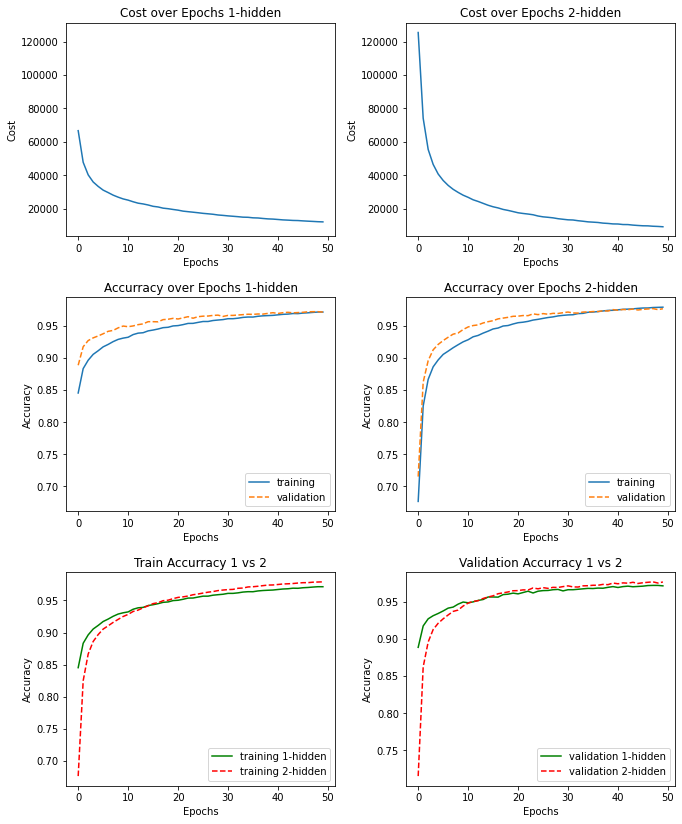

In [20]:
## plot the cost function for each, the training over validation for each
## and then plot training for both over eachother and validation for both over eachother

import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize = (10, 12), nrows=3, ncols=2)
fig.tight_layout(pad=4.0)

axs[0, 0].plot(range(nn.epochs), nn.eval_['cost'])
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Cost')
axs[0, 0].set_title('Cost over Epochs 1-hidden')

axs[0, 1].plot(range(nn2.epochs), nn2.eval_['cost'])
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Cost')
axs[0, 1].set_title('Cost over Epochs 2-hidden')
axs[0, 0].set_ylim(axs[0, 1].get_ylim())


axs[1, 0].plot(range(nn.epochs), nn.eval_['train_acc'], label='training')
axs[1, 0].plot(range(nn.epochs), nn.eval_['valid_acc'], label='validation', linestyle='--')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].set_title('Accurracy over Epochs 1-hidden')
axs[1, 0].legend(loc='lower right')

axs[1, 1].plot(range(nn.epochs), nn2.eval_['train_acc'], label='training')
axs[1, 1].plot(range(nn.epochs), nn2.eval_['valid_acc'], label='validation', linestyle='--')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].set_title('Accurracy over Epochs 2-hidden')
axs[1, 1].legend(loc='lower right')
axs[1, 0].set_ylim(axs[1, 1].get_ylim())


axs[2, 0].plot(range(nn.epochs), nn.eval_['train_acc'], label='training 1-hidden', color='green')
axs[2, 0].plot(range(nn.epochs), nn2.eval_['train_acc'], label='training 2-hidden', linestyle='--', color='red')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('Accuracy')
axs[2, 0].set_title('Train Accurracy 1 vs 2')
axs[2, 0].legend(loc='lower right')

axs[2, 1].plot(range(nn.epochs), nn.eval_['valid_acc'], label='validation 1-hidden', color='green')
axs[2, 1].plot(range(nn.epochs), nn2.eval_['valid_acc'], label='validation 2-hidden', linestyle='--', color='red')
axs[2, 1].set_xlabel('Epochs')
axs[2, 1].set_ylabel('Accuracy')
axs[2, 1].set_title('Validation Accurracy 1 vs 2')
axs[2, 1].legend(loc='lower right')


In [21]:
axs[0, 0].get_ylim()

(3492.2963860248365, 131227.7478937484)

It looks that with 2-hidden layers the cost log function starts higher and drops steeper over the epochs but they tend to converge to same number.  As for the accuracies, they start lower for the 2-hidden layers but quickly (around epoch 12-14) surpass the single hidden layer.

Test on the Test Set.

In [22]:
from sklearn.metrics import accuracy_score 

y_pred = nn.predict(X_test)
y_pred2 = nn2.predict(X_test)

score1 = round(accuracy_score(y_pred, y_test), 3) * 100
score2 = round(accuracy_score(y_pred2, y_test), 3) * 100

print(f'{"Accuracy score for single hidden layer":<39} {score1}%')
print(f'{"Accuracy score for 2 hidden layers":<39} {score2}%')

Accuracy score for single hidden layer  96.3%
Accuracy score for 2 hidden layers      97.0%
